<a href="https://colab.research.google.com/github/kiyara17777/kiyara17777/blob/main/Student_dropout_prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 📄 Introduction
This project aims to predict student dropout rates using machine learning models.
The dataset contains demographic, academic, and socio-economic attributes of students,
and the target variable indicates whether a student has dropped out or not.

The key objectives of this analysis are:

Data Exploration: Understand the distribution and relationships of features.

Data Preprocessing: Handle missing values, encode categorical variables, and scale numerical features.

Model Training & Evaluation: Compare multiple machine learning algorithms to determine the best performer.

Insights & Recommendations: Identify the key factors influencing dropout rates.

Through this project, we aim to provide actionable insights for educational institutions
to reduce dropout rates and improve student retention.

#  1.Set Up




##1.1 Mount Google Drive
Connects Google Drive to Colab so you can access datasets stored there.

In [ ]:
# ✅1.1 Mount Google Drive
from google.colab import drive
drive.mount('/content/drive')




Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


##1.2 Import Required Libraries
Imports all necessary Python packages for data handling, preprocessing, visualization, and machine learning.

In [ ]:
# ✅1.2 Import libraries
import pandas as pd
from sklearn.preprocessing import LabelEncoder, MinMaxScaler
from sklearn.model_selection import train_test_split



##1.3 Load Dataset & Initial Data Overview
Reads the CSV file from Google Drive into a Pandas DataFrame and Displays dataset shape, column names, and first few rows.

In [ ]:
# ✅ 1.3 Load the dataset
file_path = '/content/drive/MyDrive/Student_Dropout_Prediction_Project/student dropout.csv'

try:
    df = pd.read_csv(file_path)
    print("✅ Dataset loaded successfully.")
    print("Shape of the dataset:", df.shape)
    print("First 5 rows:")
    display(df.head())
except Exception as e:
    print("❌ Error loading the file:", e)

✅ Dataset loaded successfully.
Shape of the dataset: (649, 34)
First 5 rows:


,School,Gender,Age,Address,Family_Size,Parental_Status,Mother_Education,Father_Education,Mother_Job,Father_Job,...,Free_Time,Going_Out,Weekend_Alcohol_Consumption,Weekday_Alcohol_Consumption,Health_Status,Number_of_Absences,Grade_1,Grade_2,Final_Grade,Dropped_Out
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,3,4,1,1,3,4,0,11,11,False
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,3,3,1,1,3,2,9,11,11,False
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,3,2,2,3,3,6,12,13,12,False
3,GP,F,15,U,GT3,T,4,2,health,services,...,2,2,1,1,5,0,14,14,14,False
4,GP,F,16,U,GT3,T,3,3,other,other,...,3,2,1,2,5,0,11,13,13,False


#  2.Data Cleaning & Preprocessing




## 2.1 Handle Missing Values
Fills missing entries using forward-fill or other strategies.


In [ ]:
# ✅ Handle missing values
df.ffill(inplace=True)






## 2.2 Encode Categorical Variables
Converts categorical features into numeric form (Label Encoding & One-Hot Encoding).


In [ ]:
# ✅ Encode binary categorical columns
binary_cols = ['Gender', 'Address', 'Family_Size', 'Parental_Status',
               'School_Support', 'Family_Support', 'Extra_Paid_Class',
               'Extra_Curricular_Activities', 'Attended_Nursery',
               'Wants_Higher_Education', 'Internet_Access', 'In_Relationship', 'Dropped_Out']

le = LabelEncoder()
for col in binary_cols:
    if col in df.columns:
        df[col] = le.fit_transform(df[col])



In [ ]:
# ✅ One-hot encode multi-class categorical columns
multi_class_cols = ['Mother_Job', 'Father_Job', 'Guardian', 'School', 'Reason_for_Choosing_School']
df = pd.get_dummies(df, columns=multi_class_cols, drop_first=True)





## 2.3 Feature Scaling
Normalizes numerical features using MinMaxScaler.



In [ ]:
# ✅ Scale numerical features
numerical_cols = ['Age', 'Travel_Time', 'Study_Time', 'Number_of_Failures',
                  'Family_Relationship', 'Free_Time', 'Going_Out',
                  'Weekend_Alcohol_Consumption', 'Weekday_Alcohol_Consumption',
                  'Health_Status', 'Number_of_Absences', 'Grade_1', 'Grade_2', 'Final_Grade']

scaler = MinMaxScaler()
df[numerical_cols] = scaler.fit_transform(df[numerical_cols])



In [ ]:
# ✅ Separate features and target
X = df.drop('Dropped_Out', axis=1)
y = df['Dropped_Out']





## 2.4 Train-Test Split
Splits data into training and testing sets with stratification.

In [ ]:
# ✅ Train-test split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

print("✅ Preprocessing complete.")
print("Train shape:", X_train.shape)
print("Test shape:", X_test.shape)

✅ Preprocessing complete.
Train shape: (519, 42)
Test shape: (130, 42)


# 3.Exploratory Data Analysis (EDA)






## 3.1 Target Variable Distribution
Plots class balance for dropout prediction.


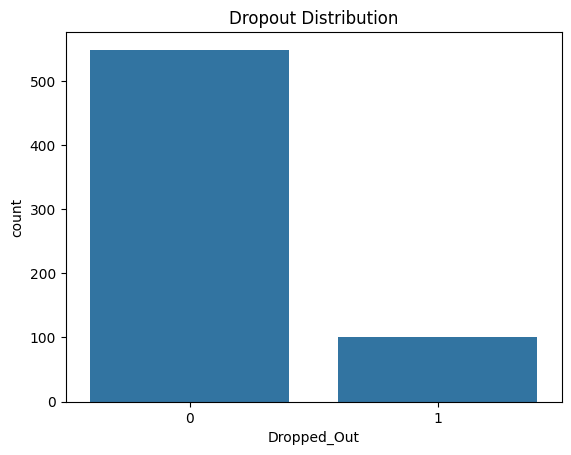

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns


# Ensure visuals display correctly
%matplotlib inline

# ✅ Check class balance
sns.countplot(data=df, x='Dropped_Out')
plt.title("Dropout Distribution")
plt.show()



##  3.2 Dropout by Gender
Shows dropout rate split by gender.

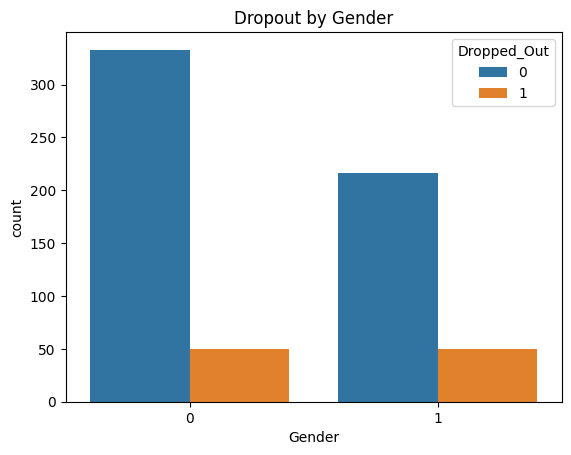

In [ ]:
# ✅ Dropout rate by gender
sns.countplot(data=df, x='Gender', hue='Dropped_Out')
plt.title("Dropout by Gender")
plt.show()





## 3.3 Dropout by Parental Status
Compares dropout rates for different parental statuses.


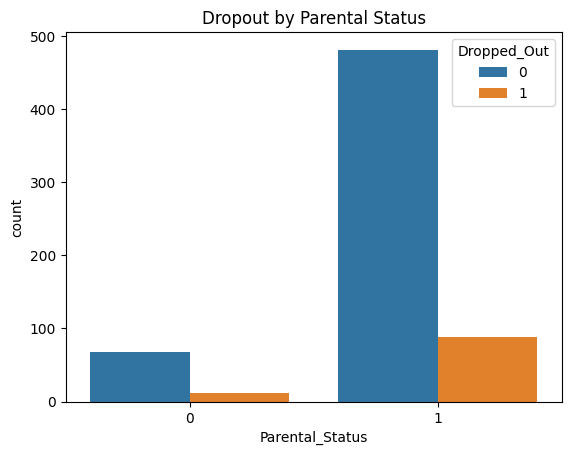

In [ ]:


# ✅ Dropout by Parental Status
sns.countplot(data=df, x='Parental_Status', hue='Dropped_Out')
plt.title("Dropout by Parental Status")
plt.show()





## 3.4 Study Time vs Dropout
Visualizes how study time relates to dropout likelihood.



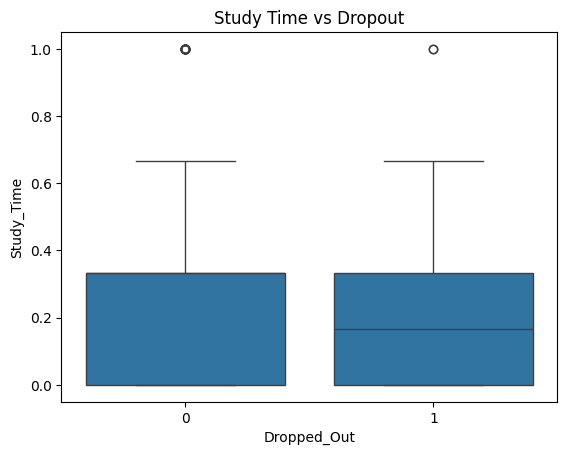

In [ ]:

# ✅ Dropout vs Study Time
sns.boxplot(data=df, x='Dropped_Out', y='Study_Time')
plt.title("Study Time vs Dropout")
plt.show()



## 3.5 Correlation Heatmap
Shows correlations between features.

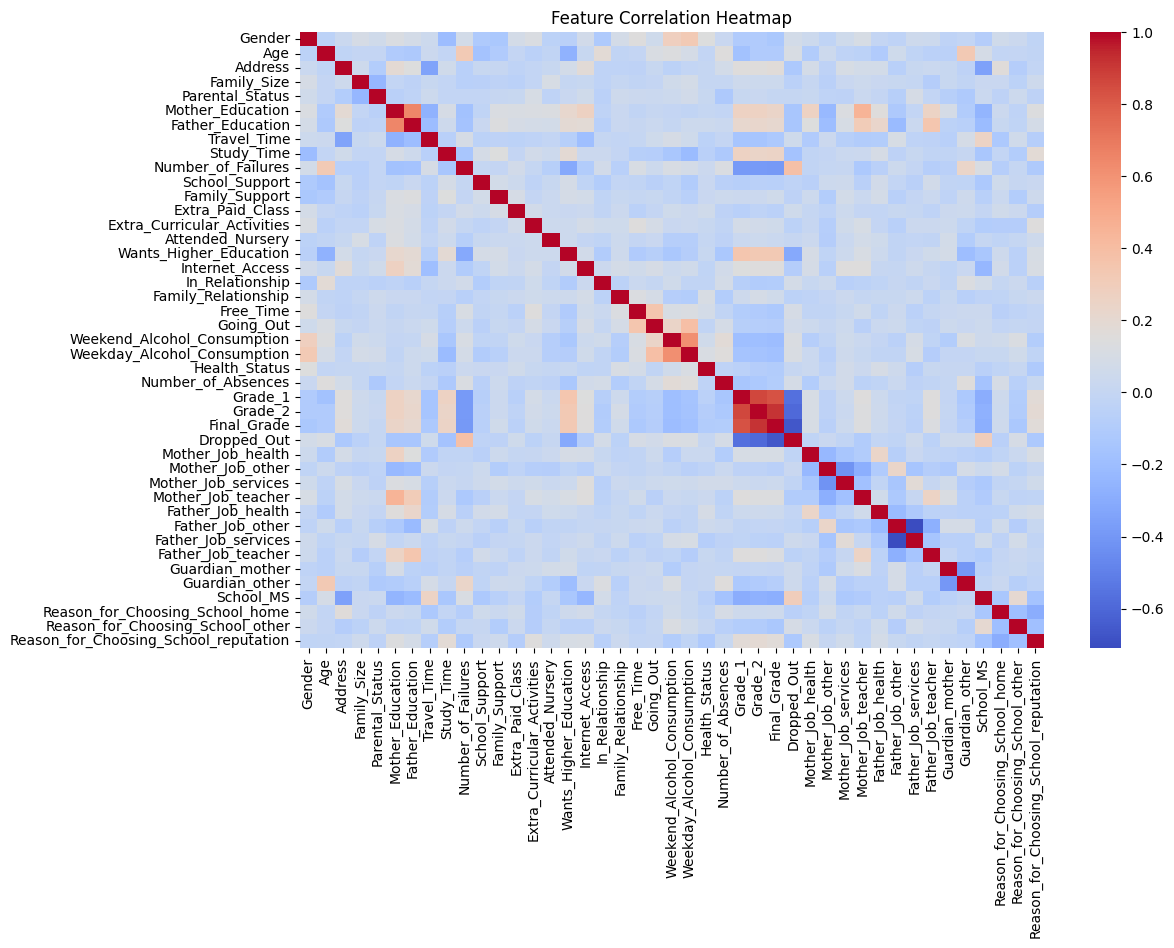

In [ ]:

# ✅ Correlation Heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(df.corr(), cmap='coolwarm', annot=False)
plt.title("Feature Correlation Heatmap")
plt.show()

# 4.Model Training & Evaluation



##  4.1 Train Baseline Models
Trains Logistic Regression, Decision Tree, and Random Forest.



In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, f1_score, roc_auc_score, classification_report

# 📌 Step 1: Define X and y again (in case notebook restarted)
X = df.drop(columns=['Dropped_Out'])
y = df['Dropped_Out']

# 📌 Step 2: Train-test split (stratify to maintain class balance)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=42)

# 📌 Step 3: Define models
models = {
    'Logistic Regression': LogisticRegression(max_iter=1000),
    'Decision Tree': DecisionTreeClassifier(),
    'Random Forest': RandomForestClassifier()
}

##4.2 Evaluate Baseline Models
Calculates Accuracy, F1 Score, and ROC-AUC for each model.

In [ ]:


# 📌 Step 4: Train and evaluate
results = []

for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    acc = accuracy_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    roc = roc_auc_score(y_test, y_pred)

    results.append({
        'Model': name,
        'Accuracy': round(acc, 3),
        'F1 Score': round(f1, 3),
        'ROC-AUC': round(roc, 3)
    })

# 📌 Step 5: Convert to DataFrame
import pandas as pd
results_df = pd.DataFrame(results)
print(results_df)


                 Model  Accuracy  F1 Score  ROC-AUC
0  Logistic Regression     0.885     0.545    0.707
1        Decision Tree     1.000     1.000    1.000
2        Random Forest     0.985     0.947    0.950


##4.3 Hyperparameter Tuning (GridSearchCV)
Tunes SVM and XGBoost models for better performance.

In [ ]:
from sklearn.svm import SVC
from xgboost import XGBClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score, f1_score, roc_auc_score
import pandas as pd  # Make sure you have this
# ✅ Initialize results list
results = []

# 📌 Step 1: Define parameter grids
xgb_params = {
    'n_estimators': [100, 200],
    'max_depth': [3, 5],
    'learning_rate': [0.01, 0.1]
}

svm_params = {
    'C': [0.1, 1, 10],
    'kernel': ['rbf', 'linear']
}

# 📌 Step 2: GridSearchCV
xgb = XGBClassifier(use_label_encoder=False, eval_metric='logloss')
xgb_grid = GridSearchCV(xgb, xgb_params, cv=3, scoring='f1', n_jobs=-1)
xgb_grid.fit(X_train, y_train)
xgb_best = xgb_grid.best_estimator_

svm = SVC(probability=True)
svm_grid = GridSearchCV(svm, svm_params, cv=3, scoring='f1', n_jobs=-1)
svm_grid.fit(X_train, y_train)
svm_best = svm_grid.best_estimator_

# 📌 Step 3: Evaluation
final_models = {
    'XGBoost': xgb_best,
    'SVM': svm_best
}

for name, model in final_models.items():
    y_pred = model.predict(X_test)
    acc = accuracy_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    roc = roc_auc_score(y_test, y_pred)

    results.append({
        'Model': name,
        'Accuracy': round(acc, 3),
        'F1 Score': round(f1, 3),
        'ROC-AUC': round(roc, 3)
    })

# 📌 Step 4: Final table
results_df = pd.DataFrame(results)
print(results_df)


/usr/local/lib/python3.11/dist-packages/xgboost/training.py:183: UserWarning: [07:54:54] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


     Model  Accuracy  F1 Score  ROC-AUC
0  XGBoost     1.000       1.0    1.000
1      SVM     0.969       0.9    0.941


##4.4 Final Model Performance Comparison
Compares all models in a bar chart.

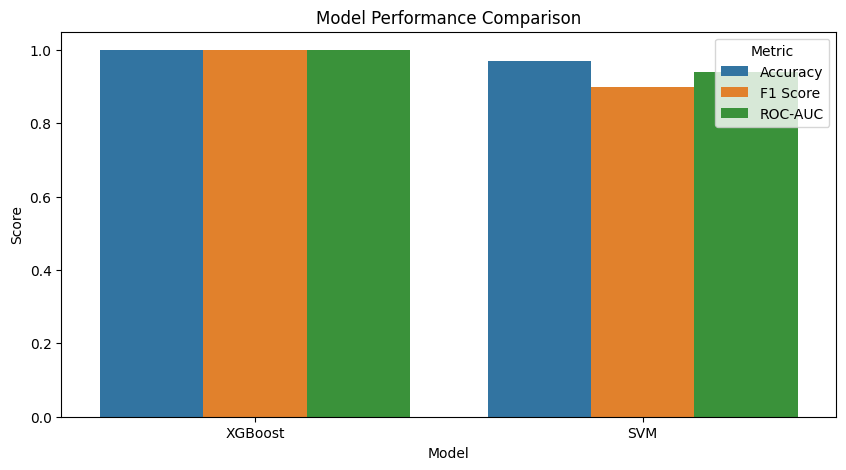

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 5))
sns.barplot(data=results_df.melt(id_vars='Model'), x='Model', y='value', hue='variable')
plt.title("Model Performance Comparison")
plt.ylabel("Score")
plt.legend(title="Metric")
plt.show()


# Installing SHAP

In [ ]:
!pip install shap


In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split

# Assuming your data is already loaded in X and y
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train the model and assign it to `best_model`
best_model = RandomForestClassifier(n_estimators=100, random_state=42)
best_model.fit(X_train, y_train)


RandomForestClassifier(random_state=42)

# 5.SHAP Summary Plot
This section shows the SHAP summary plot for the best model.
The plot visualizes feature importance and the direction of their impact on dropout predictions.




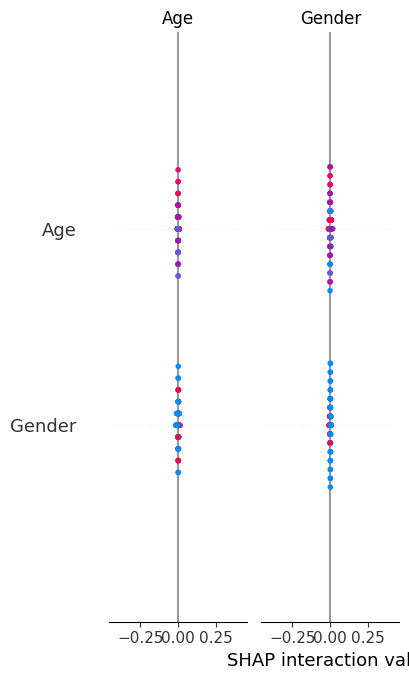

In [ ]:
import shap
import matplotlib.pyplot as plt

# Step 1: Create SHAP explainer
explainer = shap.TreeExplainer(best_model)

# Step 2: Compute SHAP values
shap_values = explainer.shap_values(X_test)

# Step 3: Plot global feature importance
shap.summary_plot(shap_values, X_test)

# Step 4: (Optional) Save SHAP plot to PNG
# NOTE: SHAP uses its own JS/interactive plot; to save a static PNG, wrap it in a matplotlib figure
plt.gcf().set_size_inches(10, 6)  # Optional: Set size of figure
plt.savefig("shap_summary_plot.png", bbox_inches='tight')
plt.close()


## 5.1 Logistic Regression Feature Weights

This plot shows the relative importance of each feature in predicting student dropout, based on a linear (Logistic Regression) model.

Positive weights indicate a higher likelihood of dropout, while negative weights are associated with retention. This makes it easier to interpret the model's decisions.

We used this as a complementary explainability method alongside SHAP.



Logistic Regression Accuracy: 0.9615384615384616


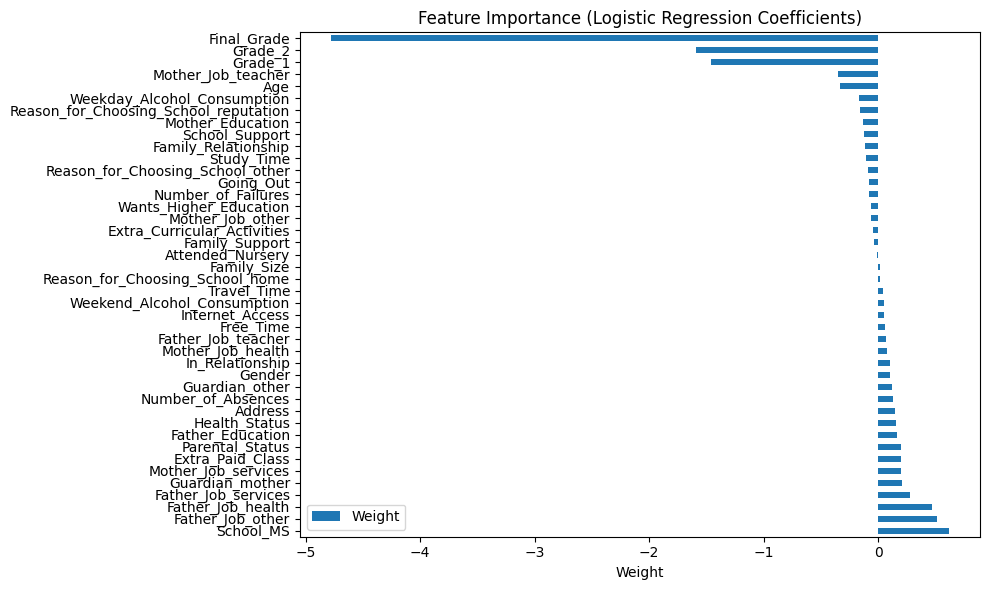

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline
import matplotlib.pyplot as plt
import pandas as pd

from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline

# Logistic Regression model pipeline with scaling
logistic_model = make_pipeline(StandardScaler(), LogisticRegression(max_iter=1000, random_state=42))

# Train the model
logistic_model.fit(X_train, y_train)

# Predict to check accuracy (optional)
print("Logistic Regression Accuracy:", logistic_model.score(X_test, y_test))

# Extract the logistic regression model from the pipeline
lr = logistic_model.named_steps['logisticregression']

# Plotting feature weights
import matplotlib.pyplot as plt
import pandas as pd

weights = pd.DataFrame(lr.coef_[0], index=X.columns, columns=["Weight"])
weights.sort_values(by="Weight", ascending=False).plot(kind='barh', figsize=(10, 6))
plt.title("Feature Importance (Logistic Regression Coefficients)")
plt.xlabel("Weight")
plt.tight_layout()
plt.savefig("logistic_regression_feature_weights.png")
plt.show()


## 5.2 Confusion Matrix – Best Model
This section displays the confusion matrix for the best-performing model.  
It shows the number of correct and incorrect predictions for each class, helping evaluate model accuracy and error distribution.


In [ ]:
from sklearn.metrics import classification_report, confusion_matrix

y_pred = best_model.predict(X_test)
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))



Confusion Matrix:
 [[115   0]
 [  0  15]]

Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00       115
           1       1.00      1.00      1.00        15

    accuracy                           1.00       130
   macro avg       1.00      1.00      1.00       130
weighted avg       1.00      1.00      1.00       130



## 5.3 Confusion Matrix – Logistic Regression
This section displays the confusion matrix for the Logistic Regression model.  
It allows comparison of classification performance with the best model, highlighting differences in precision and recall between the two approaches.

In [ ]:
y_pred_lr = logistic_model.predict(X_test)
print("Confusion Matrix (LogReg):\n", confusion_matrix(y_test, y_pred_lr))
print("\nClassification Report (LogReg):\n", classification_report(y_test, y_pred_lr))


Confusion Matrix (LogReg):
 [[112   3]
 [  2  13]]

Classification Report (LogReg):
               precision    recall  f1-score   support

           0       0.98      0.97      0.98       115
           1       0.81      0.87      0.84        15

    accuracy                           0.96       130
   macro avg       0.90      0.92      0.91       130
weighted avg       0.96      0.96      0.96       130




#  🏁 Conclusion
In this study, we evaluated several machine learning models including Logistic Regression,
Decision Tree, Random Forest, SVM, and XGBoost for predicting student dropout.

Key findings:

Best Model: XGBoost achieved the highest accuracy, F1 score, and ROC-AUC.

Important Factors: Features like study time, parental status, grades, and absences were significant in predicting dropout.

Practical Implications: Educational institutions can focus on academic support, parental engagement,
and attendance monitoring to reduce dropouts.

This project demonstrates that predictive analytics can be a powerful tool in the education sector,
helping stakeholders make data-driven decisions for student success.